**Assignment: CIFAR-10 Classification**

During the last two weeks you learned how to make use of TensorFlow functionalities to build neural networks. This week you will do the same implementing a Convolutional Neural Network.

**1.1 Prepare the Dataset**

First familiarise yourself with the dataset. It is included as a TensorFlow Dataset but can also be obtained from other sources. Try to understand how it works (information in the data, dataset size, image size, are there color channels, type the data is stored as, etc.). Understanding the data you are working with and applying respective preprocessing steps is a major part of the process for real life applications.
Now that you familiarised yourself with it, load the data and apply respective preprocessing steps using a data pipeline (In case of problems refer to your old homework tasks or the Courseware). Visualize a sample of the dataset.

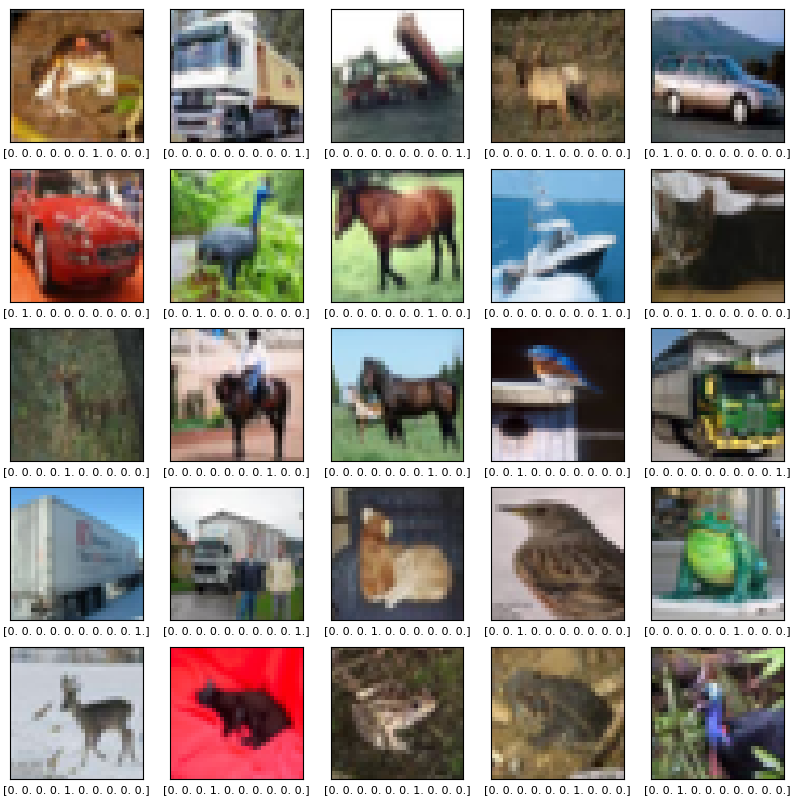

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#convert data to float32
train_images, test_images = tf.cast(train_images, tf.float32), tf.cast(test_images, tf.float32)

#normalize pixel values to be between -1 and 1
train_images, test_images = (train_images/255.), (test_images/255.)

#create one-hot targets
train_labels = tf.one_hot(tf.squeeze(train_labels), depth=10)  # Remove the singleton dimension
test_labels = tf.one_hot(tf.squeeze(test_labels), depth=10)  # Remove the singleton dimension

#print(test_labels[1])
#print(test_labels[1][0])

#visualization of a sample of the dataset

#create a new figure with size 10x10
plt.figure(figsize=(10,10))
#take a sample of 25 images
for i in range(25):
    #in a grid with 5x5 images, place image at inidex i+1
    plt.subplot(5,5,i+1)
    #"remove" x and y ticks
    plt.xticks([])
    plt.yticks([])
    #dont't show grid lines
    plt.grid(False)
    #show images at train_images[i]
    plt.imshow(train_images[i])
    #get the respective label of the current image and set it as xlabel
    plt.xlabel(str(train_labels[i].numpy()), fontsize = 8)

plt.show()


**1.2 The CNN Model**

Build a Convolutional Neural Network inspired by the information gained in this weeks Courseware. You are going to need more than the dense-layers used so far. Start with a basic structure and don’t necessarily think about optimizing the architecture too much, as this will be part of the last step.


In [ ]:
#initialize the model
model = tf.keras.models.Sequential()
#adding layers to the model
model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3))) #32 filters, 3x3 kernel size
model.add(layers.MaxPooling2D((2,2))) #2x2 poolsize
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 filters, 3x3 kernel size
model.add(layers.MaxPooling2D((2, 2))) #2x2 poolsize
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 filters, 3x3 kernel size

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
#complete the model by adding Dense layers
#flatten the 3D tensor - since Dense layers only take 1D vectors as input
model.add(layers.Flatten())
#add Dense layers
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

**1.3 Training the network**

Define a training loop function. Define your hyperparameters, think of an appropriate loss function and optimizer and initialize everything. Store loss and accuracy for training and test data. Training your network for a maximum of 15 epochs should be enough.

In [ ]:
#compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 77s 48ms/step - loss: 1.5519 - accuracy: 0.4377 - val_loss: 1.3160 - val_accuracy: 0.5172
Epoch 2/15
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1548 - accuracy: 0.5929 - val_loss: 1.1148 - val_accuracy: 0.6055
Epoch 3/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9855 - accuracy: 0.6529 - val_loss: 1.1299 - val_accuracy: 0.6184
Epoch 4/15
1563/1563 [==============================] - 73s 46ms/step - loss: 0.8809 - accuracy: 0.6926 - val_loss: 1.0114 - val_accuracy: 0.6616
Epoch 5/15
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7994 - accuracy: 0.7215 - val_loss: 1.0067 - val_accuracy: 0.6631
Epoch 6/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7378 - accuracy: 0.7449 - val_loss: 0.9490 - val_accuracy: 0.6940
Epoch 7/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6859 - accuracy: 0.7626 - val_loss: 1.1756 -

**1.4 Visualization**

After training visualize the performance of your model and the values that you collected during training and testing.

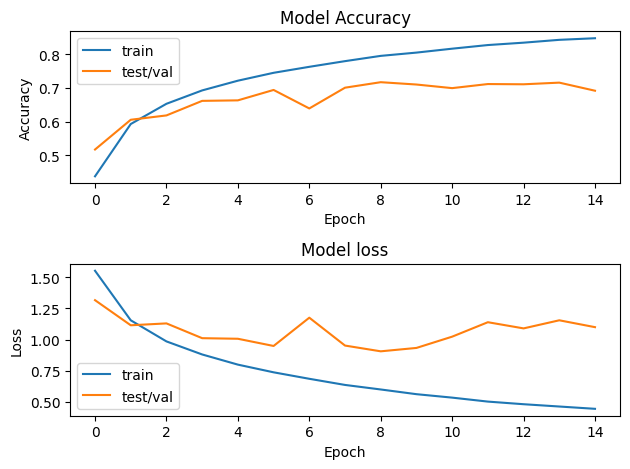

In [ ]:
fig, ax = plt.subplots(2)

#accuracy on training and test/validation data set
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
#set subplot title, labels and legend
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['train', 'test/val'], loc='upper left')

#loss on training and test/validation data set
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
#set subplot title, labels and legend
ax[1].set_title('Model loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['train', 'test/val'], loc='lower left')

fig.tight_layout()
plt.show()


**2 Adjust hyperparameters and architecture**

Now it is time to learn about the influence hyperparameter and training choices can make. Try out:

- Two different Learning Rates
- Two different Architectures (e.g. number and size of layers)
- Two different optimizers (Including Adam and one other)

In total this should create 8 respective settings, for each of which we ask you to plot:
- Training Accuracy
- Training Loss
- Test Accuracy
- Test Loss

To be explicit: This should result in a total of 8 times four plots!